In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import integrate
from IPython import display
%matplotlib inline

In [11]:
data = np.random.randint(1,10, size=10)
x = tf.constant(data, name='x')
y = tf.Variable(x**2, name='y')

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    print(session.run(y))

[81 25 49 81 49 81  4  4  1 81]


In [20]:
x = tf.Variable(0, name='x')
y = tf.Variable(0, name='y')

model = tf.global_variables_initializer()

with tf.Session() as session:
    for i in range(5):
        session.run(model)
        x += 1
        y = x**2
        print(session.run(y))

1
4
9
16
25


In [10]:
n = tf.Variable(0, name='n')
a = tf.Variable(0, name='a')
t = tf.Variable(0, name='t')

model = tf.global_variables_initializer()

with tf.Session() as sess:
    for i in range(5):
        n += 1
        r = np.random.randint(1000)
        t = t+r
        a = t/n
        sess.run(model)
        print(sess.run(a))

341
545
681
606
499


In [23]:
x = tf.constant(35, name='x')
print(x)
y = tf.Variable(x + 5, name='y')

with tf.Session() as sess:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("/tmp/basic", sess.graph)
    model =  tf.global_variables_initializer()
    sess.run(model)
    print(sess.run(y))

Tensor("x:0", shape=(), dtype=int32)
40


In [3]:
x = tf.placeholder("float", 3)
y = x ** 2

with tf.Session() as sess:
    result = sess.run(y, feed_dict={x: [1, 2, 3]})
    print(result)

[ 1.  4.  9.]


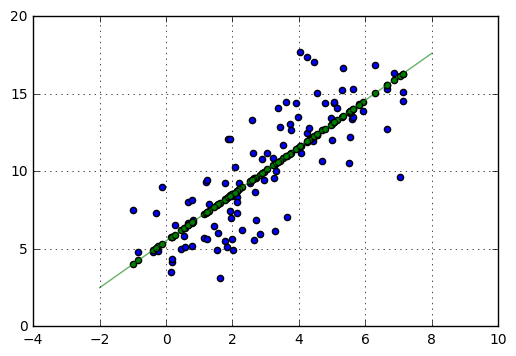

In [4]:
import tensorflow as tf         
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

num_examples = 100    #100 points
X = np.array([np.linspace(0, 6, num_examples), np.linspace(4, 16, num_examples)]) #array with 0-6 and 0-12
X += np.random.randn(2, num_examples) #add random numbers, 2 dimensions to X
x, y = X                              #split X into x and y
x_with_bias = np.array([(1., a) for a in x]).astype(np.float32) #array of [1., a] 2 by 100, the 1 is multiplied by the c weight

losses = []
training_steps = 5000
learning_rate = 0.001 #rate fo learning

with tf.Session() as sess:
    input = tf.constant(x_with_bias)
    target = tf.constant(np.transpose([y]).astype(np.float32)) #y but instead of 50 by 1, its 1 by 50
    weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1)) #random weights value, 2 by 1, mean 0, standard deviation 0.1

    tf.global_variables_initializer().run()

    yhat = tf.matmul(input, weights) #multiply x_with_bias by the weights
    yerror = tf.sub(yhat, target) #error is the target - yhat
    loss = tf.nn.l2_loss(yerror) #the error is squared and halved to punish bigger mistakes more
  
    update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
  
    for _ in range(training_steps): #100 steps
        update_weights.run() #run update wieghts
        losses.append(loss.eval()) #append to losses with the loss (the l2 error)

    betas = weights.eval() #betas is the weights
    yhat = yhat.eval()

plt.scatter(x, y) #plot points
plt.scatter(x, np.transpose(yhat)[0], c="g") #plot points with weights applied
line_x_range = (-2, 8)
plt.plot(line_x_range, [betas[0] + a * betas[1] for a in line_x_range], "g", alpha=0.6) #draw line with weights from -2 to 8
plt.grid(True)
plt.show()

In [24]:
import tensorflow as tf         
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

num_examples = 50
X = np.array([np.linspace(0, 6, num_examples), np.linspace(4, 16, num_examples)])
X += np.random.randn(2, num_examples)
x, y = X
x_with_bias = np.array([(1., a) for a in x]).astype(np.float32)
training_steps = 50
learning_rate = 0.001

with tf.Session() as sess:
    
    input = tf.constant(x_with_bias)
    target = tf.constant(np.transpose([y]).astype(np.float32))
    weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1))
    
    tf.global_variables_initializer().run()
    
    #yhat = tf.matmul(input, weights)
    yhat = tf.
    
    
    yerror = tf.sub(yhat, target)
    loss = tf.nn.l2_loss(yerror)
    
    update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    for _ in range(training_steps):
        update_weights.run()

    betas = weights.eval()
    yhat = yhat.eval()
    
plt.scatter(x, y)
plt.scatter(x, np.transpose(yhat)[0], c="g")
line_x_range = (-2, 8)
plt.plot(line_x_range, [betas[0] + a * betas[1] + a ** betas[2] for a in line_x_range], "g", alpha=0.6)
plt.grid(True)
plt.show()
print betas

SyntaxError: invalid syntax (<ipython-input-24-0d89abe8dbac>, line 24)

In [ ]:
a = tf.